DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

<br>Ticket #: Ticket number assigned to each complaint
<br>Customer Complaint: Description of complaint
<br>Date: Date of complaint
<br>Time: Time of complaint
<br>Received Via: Mode of communication of the complaint
<br>City: Customer city
<br>State: Customer state
<br>Zipcode: Customer zip
<br>Status: Status of complaint
<br>Filing on behalf of someone
<br>Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [62]:
# Import in Necessary Packages
import pandas as pd
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt

**import data into Python environment.**

In [63]:
#Import data into Python environment.
comcast_df=pd.read_csv("Comcast_telecom_complaints_data.csv",parse_dates=['Date'])

In [64]:
# Checking the Data Loaded Properly or not
comcast_df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [65]:
# Checking the Shape
comcast_df.shape

(2224, 11)

In [66]:
#Checking the Data types of columns and column details
comcast_df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

**Provide the trend chart for the number of complaints at monthly and daily granularity levels.**


In [67]:
# Grouping the Data based on Dates
df_Complaint_datewise=comcast_df.groupby('Date').count()['Customer Complaint']

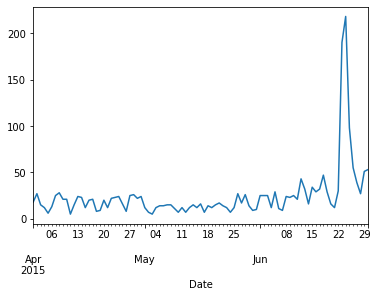

In [68]:
# Plotting the data datewise into dataframe inbuilt function
df_Complaint_datewise.plot()

In [69]:
# Creating one column Short_mon for the first day of months and then grouping by Short_mon 
comcast_df['Short_mon']=comcast_df['Date_month_year'].apply(lambda x:x[3:].upper())
comcast_df['Short_mon'] = comcast_df['Short_mon'].apply(lambda x:dt.datetime.strptime(x,'%b-%y'))
df_Complaint_monthwise=comcast_df.groupby('Short_mon').count()['Customer Complaint']

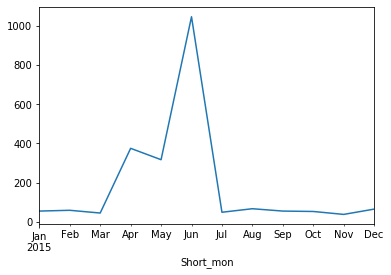

In [70]:
# Plotting the data monthwise into dataframe inbuilt function
df_Complaint_monthwise.plot()

**Provide a table with the frequency of complaint types**

In [71]:
#Grouping the data based on Customer Complaints
df_Complaint_wise=comcast_df.groupby('Customer Complaint').count()[['Ticket #']]

In [72]:
#checking data
df_Complaint_wise.head()

,Ticket #
Customer Complaint,
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!,1
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls,1
2 months and Comcast has not fixed problem,1
2+ Day Degraded Services,1
300 GB monthly allowance,1


In [73]:
# sorting the values based on customer complaints type
df_Complaint_wise.sort_values(by=['Ticket #'],ascending=False).head()

,Ticket #
Customer Complaint,
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11


**Which complaint types are maximum i.e., around internet, network issues, or across any other domains.**

In [74]:
# as we can see Comcast is coming two times we need to normalize data
comcast_df['Customer Complaint']=comcast_df['Customer Complaint'].apply(lambda x:x.upper())
df_Complaint_wise_up=comcast_df.groupby('Customer Complaint').count()[['Ticket #']]
df_Complaint_wise_up.sort_values(by=['Ticket #'],ascending=False).head()

,Ticket #
Customer Complaint,
COMCAST,102
COMCAST DATA CAP,30
COMCAST INTERNET,29
COMCAST DATA CAPS,21
COMCAST BILLING,18


**Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.**

In [75]:
# Creating a new columns
comcast_df['New_status']=comcast_df['Status']
#changing Pending to Open
comcast_df['New_status'] =comcast_df['Status'].apply(lambda x:'Open'  if x=='Pending' else x)
#changing Solved  to Close
comcast_df['New_status'] =comcast_df['New_status'].apply(lambda x:'Closed'  if x=='Solved' else x)

In [76]:
#Checking old Stats
comcast_df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [77]:
#checking unique New_status
comcast_df['New_status'].unique()

array(['Closed', 'Open'], dtype=object)

In [78]:
# Group by State and new status type
df_group_by_state_status=comcast_df.groupby(['State','New_status'] , as_index=False).count()[['Ticket #','State','New_status']]

In [79]:
#checking the data
df_group_by_state_status.tail()

,Ticket #,State,New_status
72,11,Virginia,Open
73,75,Washington,Closed
74,23,Washington,Open
75,8,West Virginia,Closed
76,3,West Virginia,Open


**Provide state wise status of complaints in stacked bar chart. Use the categorized variable from Q3. Provide insights on**

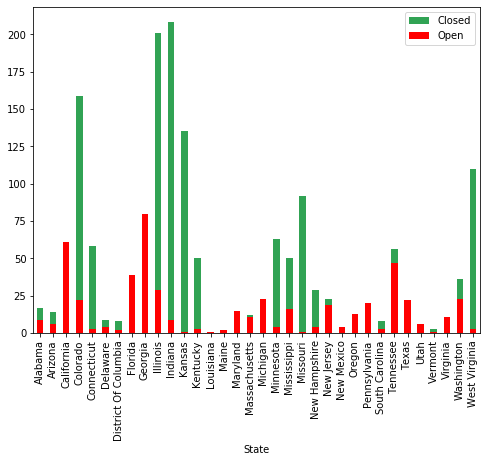

In [80]:
# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(8,6)) 
colors = ["#31A354", "#FF0000"]
for num, stat in enumerate(['Closed','Open']):
    df_group_by_state_status[df_group_by_state_status['New_status'] == stat].plot.bar(x='State',y='Ticket #', ax=ax, stacked=True, color=colors[num], label=stat)

plt.show()

**Which state has the maximum complaints**<br>
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [81]:
#Checking the All Received via calls
comcast_df['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [82]:
#Taking only  which were received through the Internet and customer care calls.
Received=pd.DataFrame(comcast_df[comcast_df['Received Via'].isin(['Customer Care Call','Internet'])])

In [83]:
# Grouping the Data state wise
Df_complain_state_wise=Received.groupby('State', as_index=False).count()[['State','Customer Complaint']]

In [84]:
#Checking the max number of Complaints statewise
Df_complain_state_wise['Customer Complaint'].max()

288

**Which state has the highest percentage of unresolved complaints**

In [85]:
Df_complain_state_wise[Df_complain_state_wise['Customer Complaint'].max()==Df_complain_state_wise['Customer Complaint']]

,State,Customer Complaint
10,Georgia,288


As we can see State Georgia has maximum complaints of 288

**Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.**

In [86]:
#Pivoting the data based on based on state and new_status type
df_group_by_status=pd.pivot_table(df_group_by_state_status,columns=['New_status'],index=['State'],values=['Ticket #'], aggfunc=np.sum,fill_value=0)
df_group_by_status.head()

Ticket #     
New_status   Closed Open
State                   
Alabama          17    9
Arizona          14    6
Arkansas          6    0
California      159   61
Colorado         58   22

In [87]:
#Creating a data frame based on pivot table
df_status_column_wise=pd.DataFrame(df_group_by_status.to_records())

In [88]:
#changing the Columns names
df_status_column_wise.columns=['State','Closed','Open']

In [89]:
# Creating a new columns baseds open and closed columns
df_status_column_wise['Percentage_unresol']=df_status_column_wise.apply(lambda row: round((row.Open/(row.Closed + row.Open))*100,2), axis=1)

In [90]:
#checking the glimpse of data
df_status_column_wise.head()

,State,Closed,Open,Percentage_unresol
0,Alabama,17,9,34.62
1,Arizona,14,6,30.00
2,Arkansas,6,0,0.00
3,California,159,61,27.73
4,Colorado,58,22,27.50


In [91]:
# Getting the maximum based on Percentage unresolved
df_status_column_wise[df_status_column_wise['Percentage_unresol'].max()==df_status_column_wise['Percentage_unresol']]

,State,Closed,Open,Percentage_unresol
14,Kansas,1,1,50.0


In [92]:
# Sort values based on Percentage Unresolved
df_status_column_wise.sort_values(by=['Percentage_unresol'],ascending=False).head()

,State,Closed,Open,Percentage_unresol
14,Kansas,1,1,50.00
15,Kentucky,4,3,42.86
22,Mississippi,23,16,41.03
17,Maine,3,2,40.00
0,Alabama,17,9,34.62


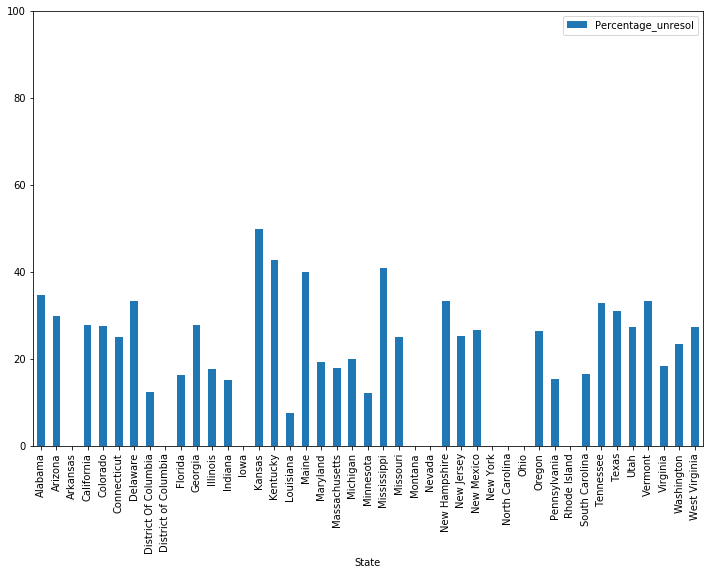

In [93]:
df_status_column_wise.plot(kind='bar',x='State',y='Percentage_unresol',figsize=(12,8),ylim = (0,100))